<a href="https://colab.research.google.com/github/daurickroy/Entri-Elevate---Project/blob/main/Online%20Shoppers%20Purchasing%20Intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ONLINE SHOPPERS PURCHASING INTENTION

The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label. Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.

The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.

The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.





# Column Descriptions:



Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
More information about how this is calculated

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.



In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')




In [85]:
data = pd.read_csv('online_shoppers_intention.csv')
df = pd.read_csv('online_shoppers_intention.csv')
data.head(5)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [86]:
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [87]:
data.describe()



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [88]:
print(data.dtypes)




Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [90]:
print(data.shape)



(12330, 18)


In [91]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
data = data.drop_duplicates()


Number of duplicate rows: 125


In [92]:
print(data.shape)

(12205, 18)


# Missing Values

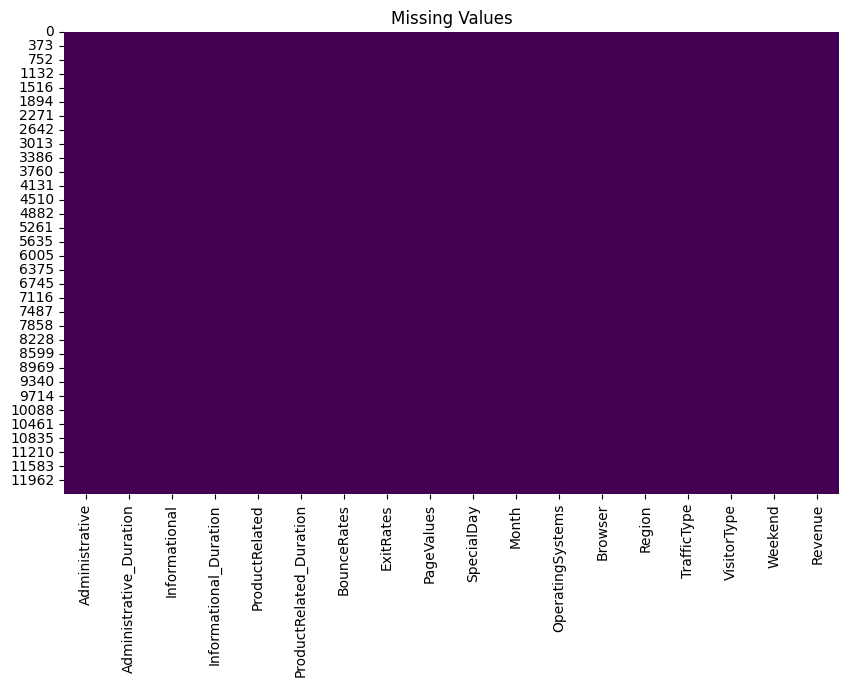

In [94]:
data.isnull().sum()

# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values')
plt.show()


# **Encoding**

In [98]:
from sklearn.preprocessing import LabelEncoder

# Encode Weekend and Revenue to 0/1
le = LabelEncoder()
df['Weekend'] = le.fit_transform(df['Weekend'])   # False -> 0, True -> 1
df['Revenue'] = le.fit_transform(df['Revenue'])   # False -> 0, True -> 1


print(df.columns)

if 'Month' in df.columns:
    df = pd.get_dummies(df, columns=['Month'], drop_first=True)
else:
    print("Column 'Month", df.columns)




Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep'],
      dtype='object')
Column 'Month Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep'],
      dtype='object')


In [113]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

# Apply to binary columns
df_encoded['Weekend'] = le.fit_transform(df_encoded['Weekend'])      # True/False to 1/0
df_encoded['Revenue'] = le.fit_transform(df_encoded['Revenue'])      # Target variable
df_encoded['VisitorType'] = le.fit_transform(df_encoded['VisitorType'])  # e.g., Returning_Visitor, New_Visitor, Other


In [111]:
df_encoded = pd.get_dummies(df_encoded, columns=['Month'], drop_first=True)
print(df.columns)



Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [112]:
print(df_encoded.head())
print(df_encoded.dtypes)


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Revenue  Month_Dec  \
0         0.20       0.20         0.0         0.0  ...        0      False   
1         0.00       0.10         0.0         0.0  ...  

# **Outliers**

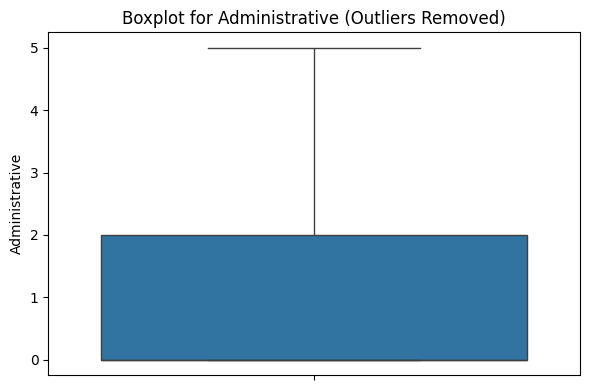

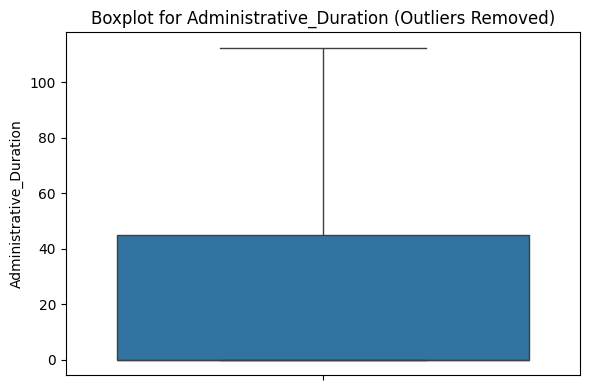

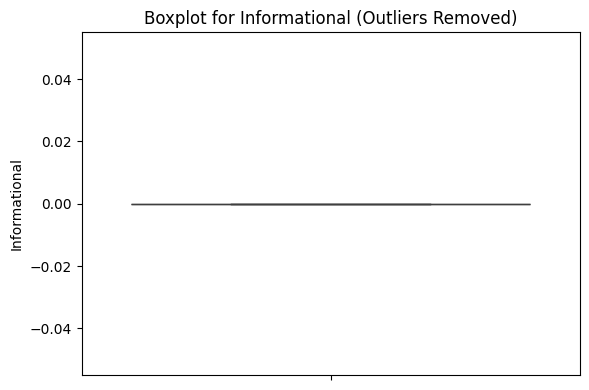

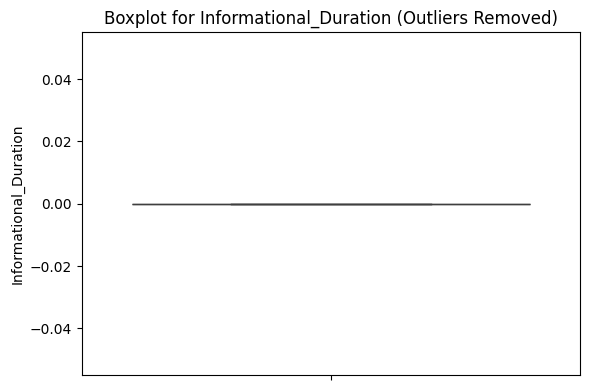

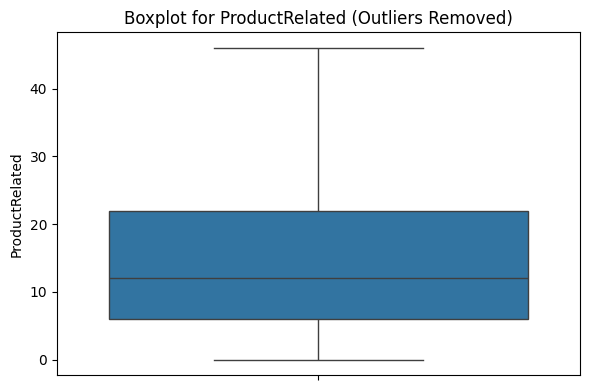

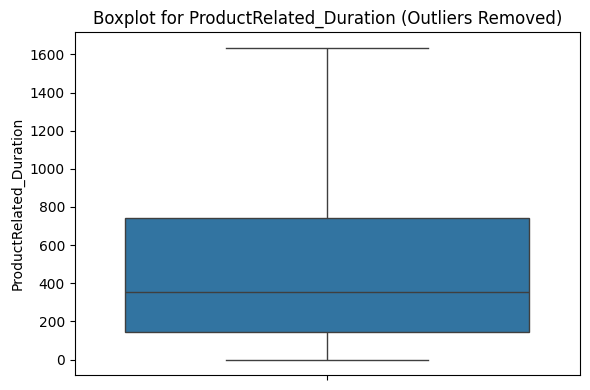

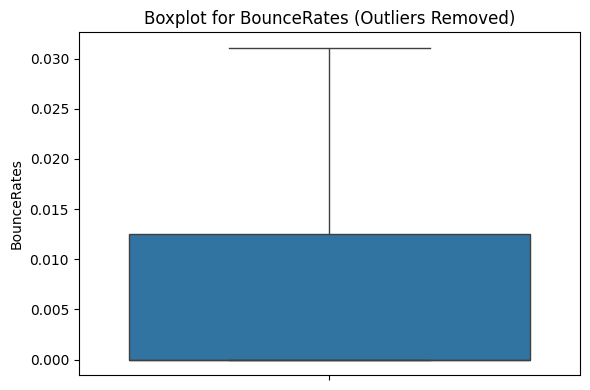

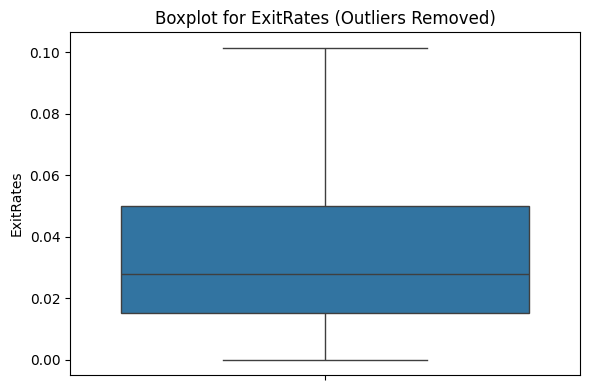

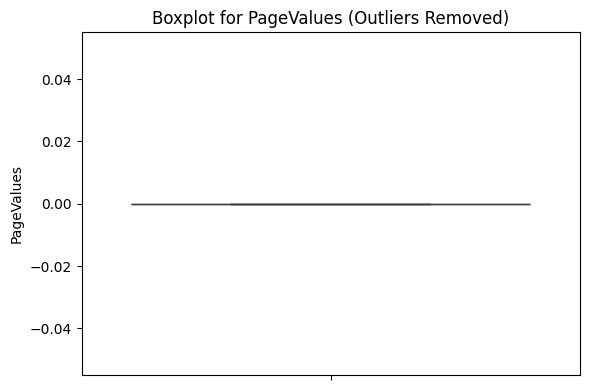

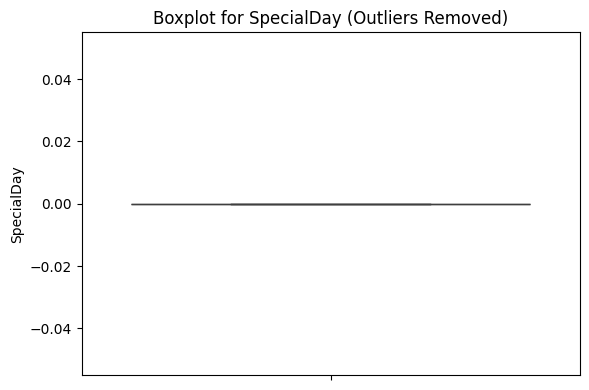

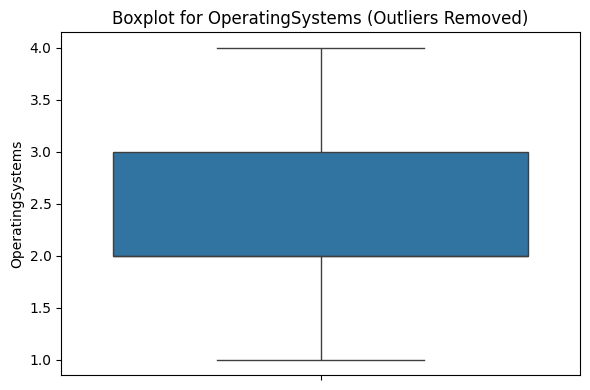

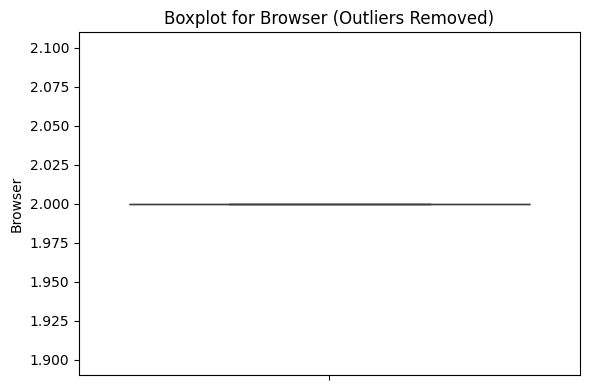

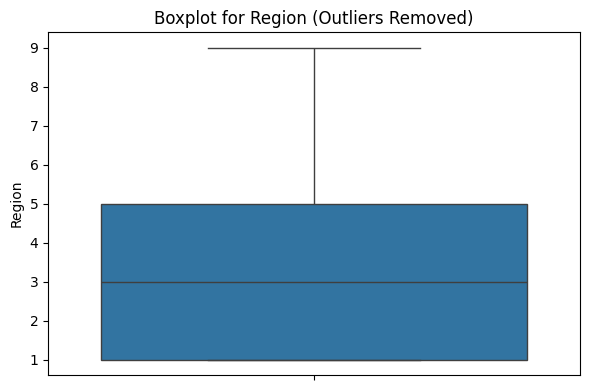

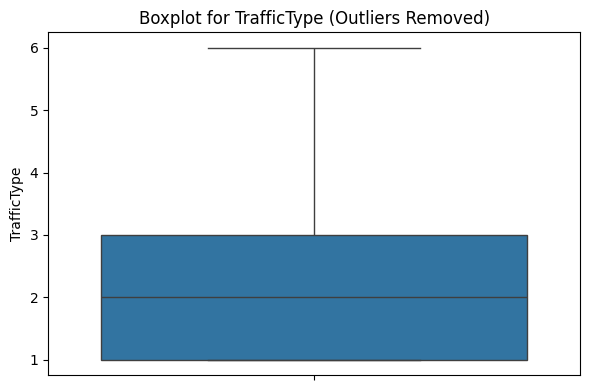

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('online_shoppers_intention.csv')

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# remove outliers using IQR
def remove_outliers_iqr(data):
    cleaned_data = data.copy()
    for col in numeric_cols:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower) & (cleaned_data[col] <= upper)]
    return cleaned_data


df_cleaned = remove_outliers_iqr(df)

# Plot boxplots for cleaned data

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_cleaned[col], showfliers=False)
    plt.title(f"Boxplot for {col} (Outliers Removed)")
    plt.tight_layout()
    plt.show()






Categorical Columns: ['Month', 'VisitorType']


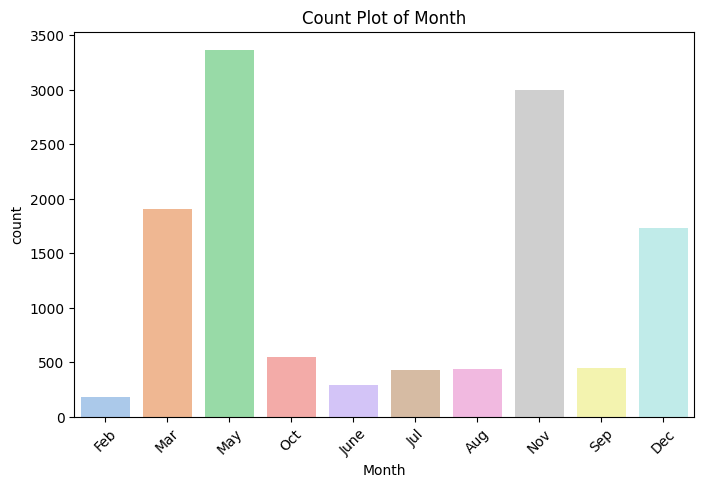

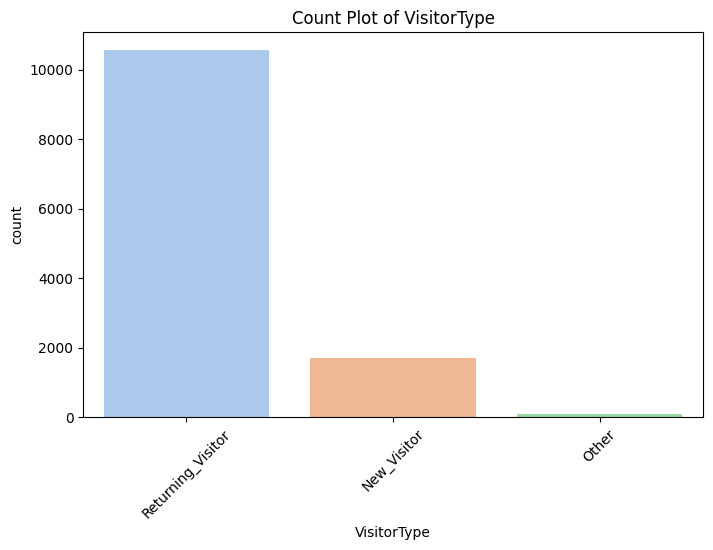

In [115]:
df = pd.read_csv('online_shoppers_intention.csv')


categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

# Countplot for Each Categorical Column
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Standardization (Scaling the data)

In [116]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns


scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

data.head()



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,Feb,-1.239776,-0.794017,-0.896370,-0.765321,Returning_Visitor,False,False
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.31024,Feb,-0.136980,-0.209237,-0.896370,-0.516347,Returning_Visitor,False,False
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,Feb,2.068612,-0.794017,2.433853,-0.267374,Returning_Visitor,False,False
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.31024,Feb,0.965816,-0.209237,-0.480092,-0.018400,Returning_Visitor,False,False
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.31024,Feb,0.965816,0.375543,-0.896370,-0.018400,Returning_Visitor,True,False


# **Visualization**

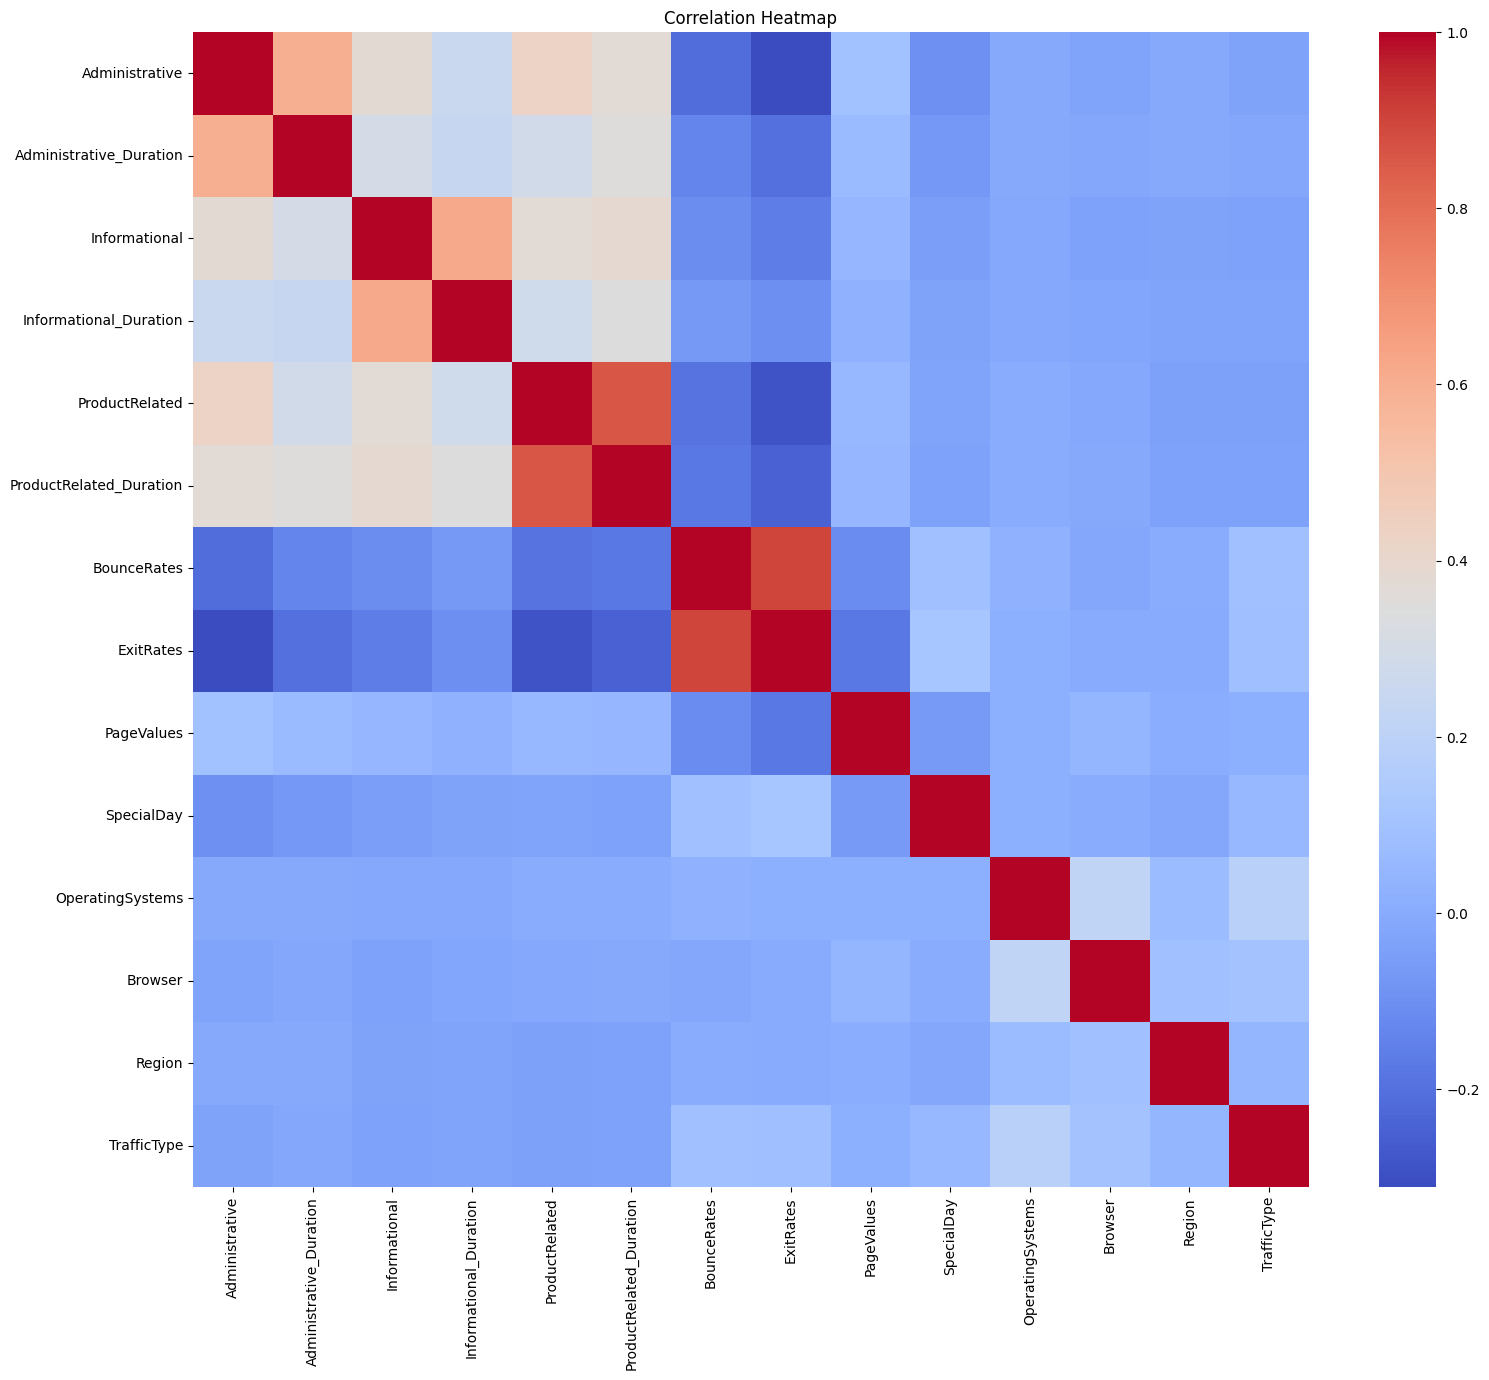

In [117]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Plot Correlation heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




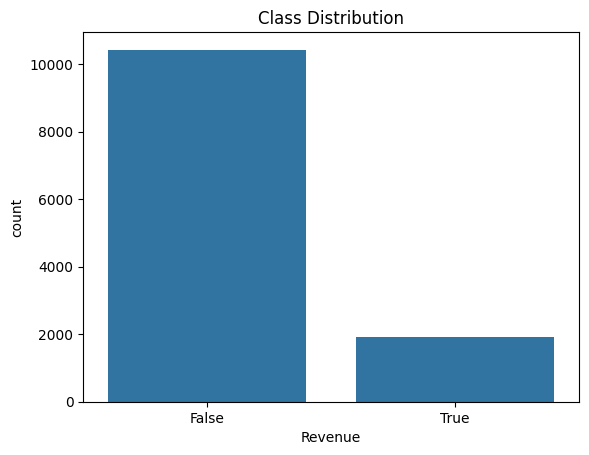

In [118]:
# Revenue class distribution
sns.countplot(x='Revenue', data=df)
plt.title('Class Distribution')
plt.show()


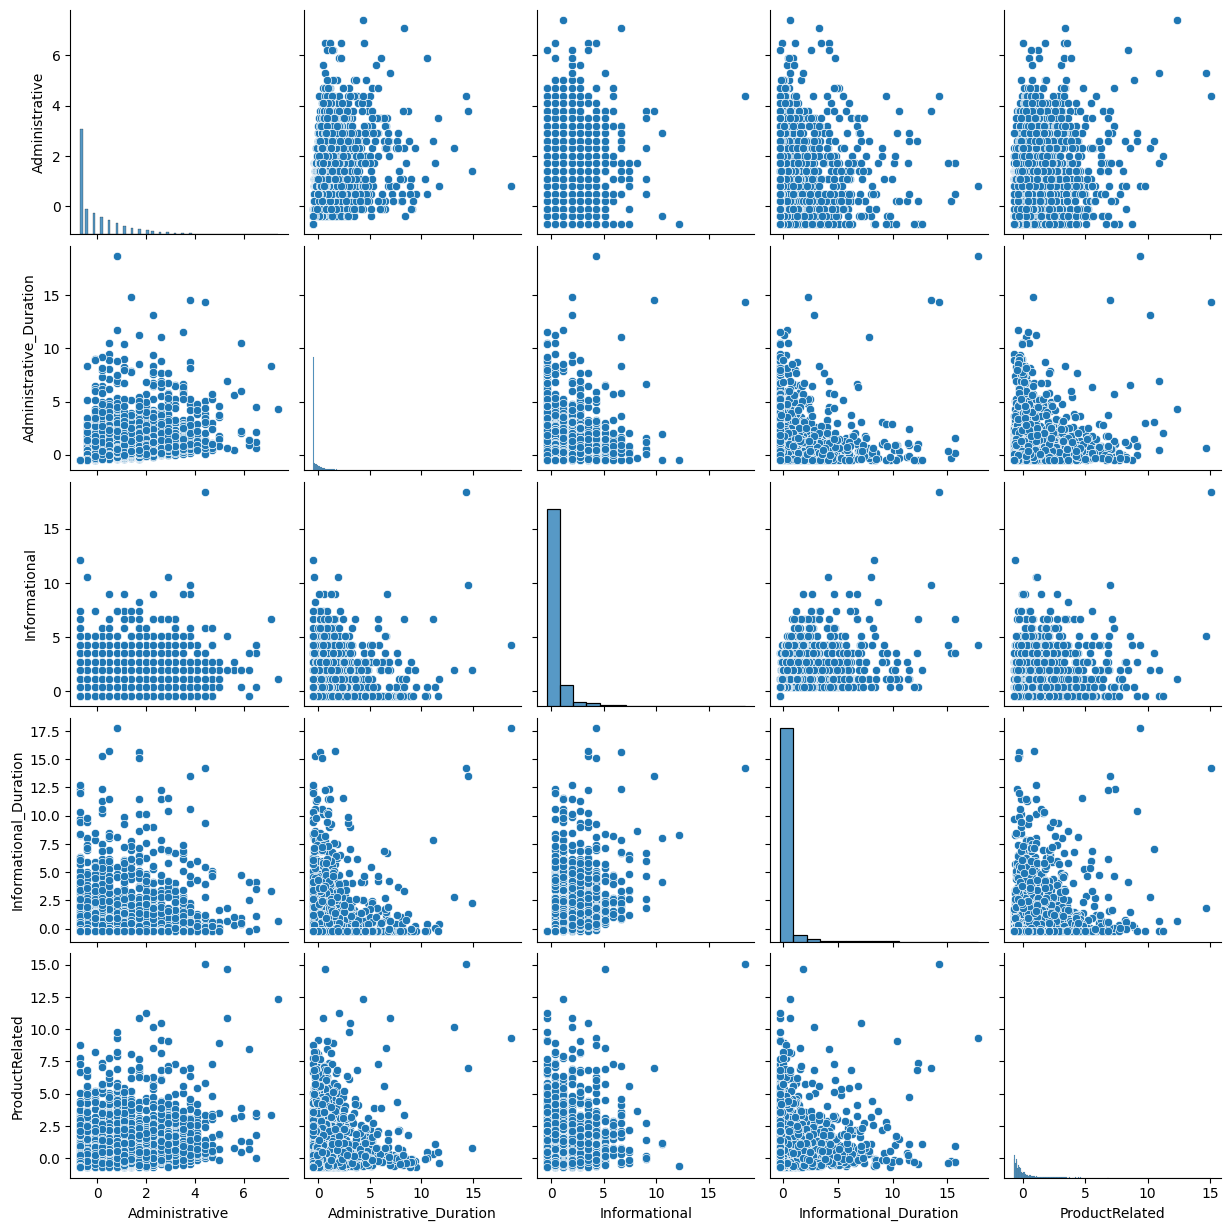

In [119]:
# Pairplot (first few features for simplicity)
sample_cols = numeric_cols[:5]
sns.pairplot(data[sample_cols])
plt.show()





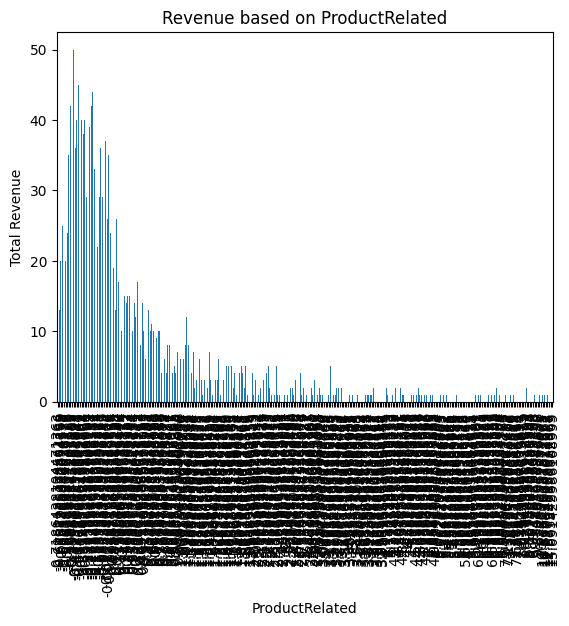

In [120]:
category_qty = data.groupby('ProductRelated')['Revenue'].sum()
category_qty.plot(kind='bar')
plt.title('Revenue based on ProductRelated')
plt.ylabel('Total Revenue')
plt.show()





In [124]:
df_encoded.to_csv('processed_data.csv', index=False)
